In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
cr = pd.read_csv('CreditRisk.csv')

In [3]:
cr.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,4.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
cr = cr.drop(['Loan_ID'], axis=1)

In [5]:
cr.shape

(981, 12)

In [6]:
cr.isnull().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
cr.isnull().sum()[cr.isnull().sum()>0]

Gender              24
Married              3
Dependents          25
Self_Employed       55
LoanAmount          27
Loan_Amount_Term    20
Credit_History      79
dtype: int64

In [8]:
cr.Credit_History.value_counts()

Credit_History
1.0    754
0.0    148
Name: count, dtype: int64

In [9]:
cr.Gender = cr.Gender.fillna('Male')

In [10]:
cr.Married = cr.Married.fillna('Yes')

In [11]:
cr.Dependents = cr.Dependents.fillna(0)

In [12]:
cr.Self_Employed = cr.Self_Employed.fillna('No')

In [13]:
cr.LoanAmount = cr.LoanAmount.fillna(cr.LoanAmount.mean())

In [14]:
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())

In [15]:
cr.Credit_History = cr.Credit_History.fillna(0)

In [16]:
cr.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 92.1+ KB


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
cr[cr.select_dtypes(include='object').columns] = cr[cr.select_dtypes(include='object').columns].apply(le.fit_transform)

In [21]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int32  
 1   Married            981 non-null    int32  
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    int32  
 4   Self_Employed      981 non-null    int32  
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    int32  
 11  Loan_Status        981 non-null    int32  
dtypes: float64(5), int32(6), int64(1)
memory usage: 69.1 KB


In [22]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
cr_train, cr_test = train_test_split(cr, test_size = .25)

In [25]:
cr_train_y = cr_train.iloc[:,-1]
cr_test_y = cr_test.iloc[:,-1]

In [26]:
cr_train_x = cr_train.iloc[:,:-1]
cr_test_x = cr_test.iloc[:,:-1]

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=50, class_weight='balanced')

In [29]:
rfc.fit(cr_train_x, cr_train_y)

RandomForestClassifier(class_weight='balanced', n_estimators=50)

In [30]:
pred = rfc.predict(cr_test_x)
pred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0])

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm = confusion_matrix(cr_test_y, pred)
cm

array([[ 40,  26],
       [ 20, 160]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [34]:
accuracy_score(cr_test_y, pred)*100

81.30081300813008

In [37]:
recall_score(cr_test_y, pred)*100

88.88888888888889

In [38]:
precision_score(cr_test_y, pred)*100

86.02150537634408

In [39]:
f1_score(cr_test_y, pred)*100

87.43169398907102

In [40]:
roc_auc_score(cr_test_y, pred)*100

74.74747474747474

In [43]:
pred_proba = rfc.predict_proba(cr_test_x)
pred_proba

array([[0.44, 0.56],
       [0.08, 0.92],
       [0.18, 0.82],
       [0.28, 0.72],
       [0.52, 0.48],
       [0.62, 0.38],
       [0.16, 0.84],
       [0.66, 0.34],
       [0.24, 0.76],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.08, 0.92],
       [0.4 , 0.6 ],
       [0.62, 0.38],
       [0.04, 0.96],
       [0.8 , 0.2 ],
       [0.06, 0.94],
       [0.08, 0.92],
       [0.58, 0.42],
       [0.1 , 0.9 ],
       [0.06, 0.94],
       [0.08, 0.92],
       [0.06, 0.94],
       [0.06, 0.94],
       [0.22, 0.78],
       [0.02, 0.98],
       [0.16, 0.84],
       [0.1 , 0.9 ],
       [0.26, 0.74],
       [0.2 , 0.8 ],
       [0.7 , 0.3 ],
       [0.76, 0.24],
       [0.48, 0.52],
       [0.06, 0.94],
       [0.22, 0.78],
       [0.24, 0.76],
       [0.24, 0.76],
       [0.22, 0.78],
       [0.14, 0.86],
       [0.12, 0.88],
       [0.06, 0.94],
       [0.52, 0.48],
       [0.2 , 0.8 ],
       [0.68, 0.32],
       [0.18, 0.82],
       [0.1 , 0.9 ],
       [0.08, 0.92],
       [0.68,

In [44]:
fpr,tpr,thr = roc_curve(cr_test_y, pred_proba[:,1])

In [45]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'AUROC Score is 0.7474')

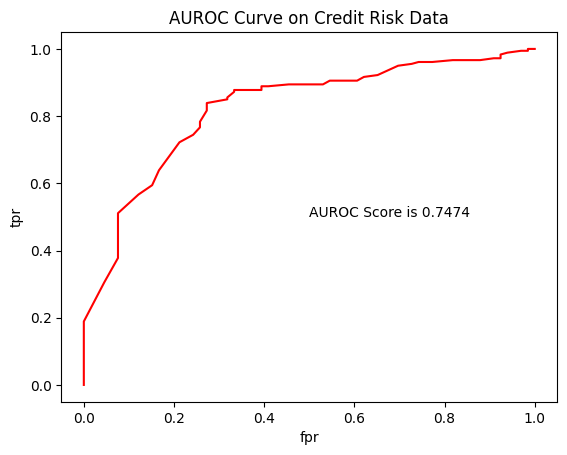

In [50]:
plt.plot(fpr,tpr,color='r')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AUROC Curve on Credit Risk Data')
plt.text(x=0.5,y=0.5,s='AUROC Score is 0.7474')

In [56]:
df = pd.DataFrame({'Features': cr_train_x.columns, 'Feature_Importances': rfc.feature_importances_})
df.sort_values('Feature_Importances', ascending=False)

,Features,Feature_Importances
9,Credit_History,0.220510
5,ApplicantIncome,0.219374
7,LoanAmount,0.206345
6,CoapplicantIncome,0.115966
8,Loan_Amount_Term,0.049642
10,Property_Area,0.049560
2,Dependents,0.047418
3,Education,0.026802
0,Gender,0.023818
1,Married,0.021914
